# EDA on Raw Messages

Coco Yu  
December 11, 2024

## Code Status

## Notes

## Setup

Chunk Defaults

In [ ]:
knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')


Conflicts

In [ ]:
options(conflicts.policy = "depends.ok")


In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at /Users/yujiachen/Desktop/github/study_messages

Source Functions

In [ ]:
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")


ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

Absolute Paths

In [ ]:
# path_shared <- format_path(str_c("studydata/risk/data_processed/shared"))
path_messages <- format_path(str_c("studydata/risk/data_processed/messages"))


Read in Data

In [ ]:
raw_data <- read_csv(here(path_messages, "eda", "eda_raw.csv")) |> glimpse()


Rows: 313492 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): id_obs, subid, text_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 313,492
Columns: 3
$ id_obs      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ subid       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ text_length <dbl> 1, 2, 8, 18, 11, 5, 10, 4, 21, 2, 3, 14, 7, 17, 1, 15, 5, …

Rows: 915833 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): lapse
dbl  (2): id_obs, subid
lgl  (1): na
dttm (1): day_start

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 915,833
Columns: 5
$ id_obs    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ subid     <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ day_start <dttm> 2017-03-25 09:00:00, 2017-03-25 09:00:00, 2017-03-25 09:00:…
$ lapse     <chr> "no lapse", "no lapse", "no lapse", "no lapse", "no lapse", …
$ na        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…

Rows: 2086041 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): lapse
dbl  (2): id_obs, subid
lgl  (1): na
dttm (1): day_start

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 2,086,041
Columns: 5
$ id_obs    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ subid     <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ day_start <dttm> 2017-03-25 09:00:00, 2017-03-25 09:00:00, 2017-03-25 09:00:…
$ lapse     <chr> "no lapse", "no lapse", "no lapse", "no lapse", "no lapse", …
$ na        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…

## EDA on lapse labels

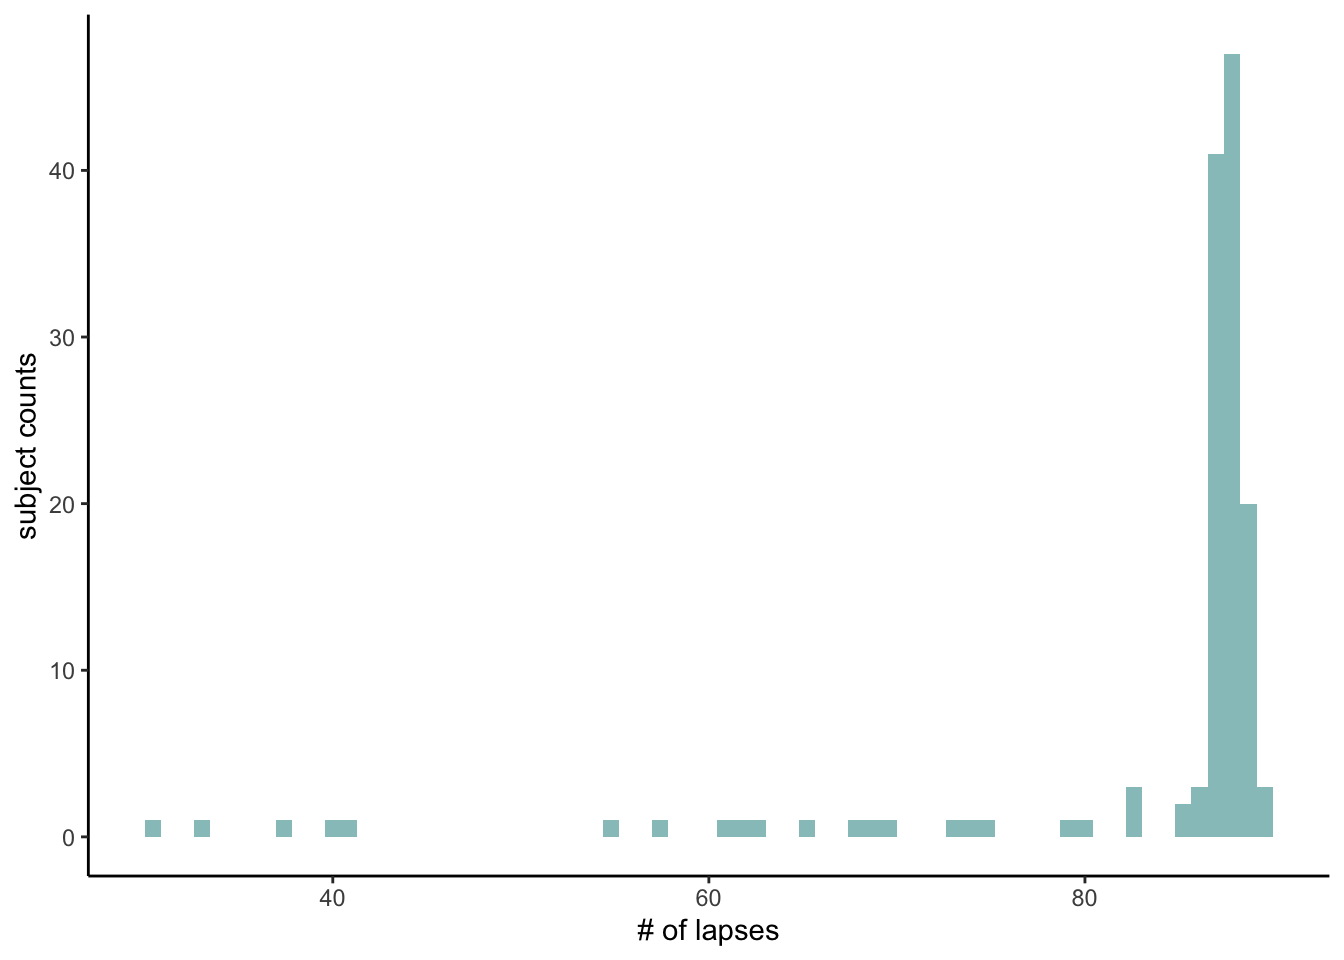

In [ ]:

labels |> 
  group_by(subid) |> 
  summarize(n = n()) |> 
  ggplot(aes(x = n)) + 
  geom_histogram(fill = "#97C4C5", bins = 70) +
  labs(y = "subject counts", x = "# of lapses")


## EDA on raw messages

### Message counts per participant

**Histogram on \# of messages per participant**

In [ ]:
plt1_raw <- raw_data |> 
  group_by(subid) |> 
  summarize(n = n()) |> 
  ggplot(aes(x = n)) + 
  geom_histogram(bins = 50, fill = "#97C4C5") +
  labs(x = "# of messages", y = "subject counts",
       caption = str_wrap("(a) Distribution of Message Counts by Subject", 
                          width = 70)) +
  theme(plot.caption = element_text(hjust = 0.5))


### Message Length per participant

**Histogram on mean/median message length per participant**

In [ ]:
plt2_raw <- raw_data |> 
  group_by(subid) |> 
  summarize(mean_length = mean(text_length)) |> 
  ggplot(aes(x = mean_length)) + 
  geom_histogram(binwidth = 1, fill = "#97C4C5") +
  labs(x = "mean message length", y = "subject counts", 
       caption = str_wrap("(b) Distribution of Mean Message Length by Subject"),
       width = 70) +
  theme(plot.caption = element_text(hjust = 0.5))


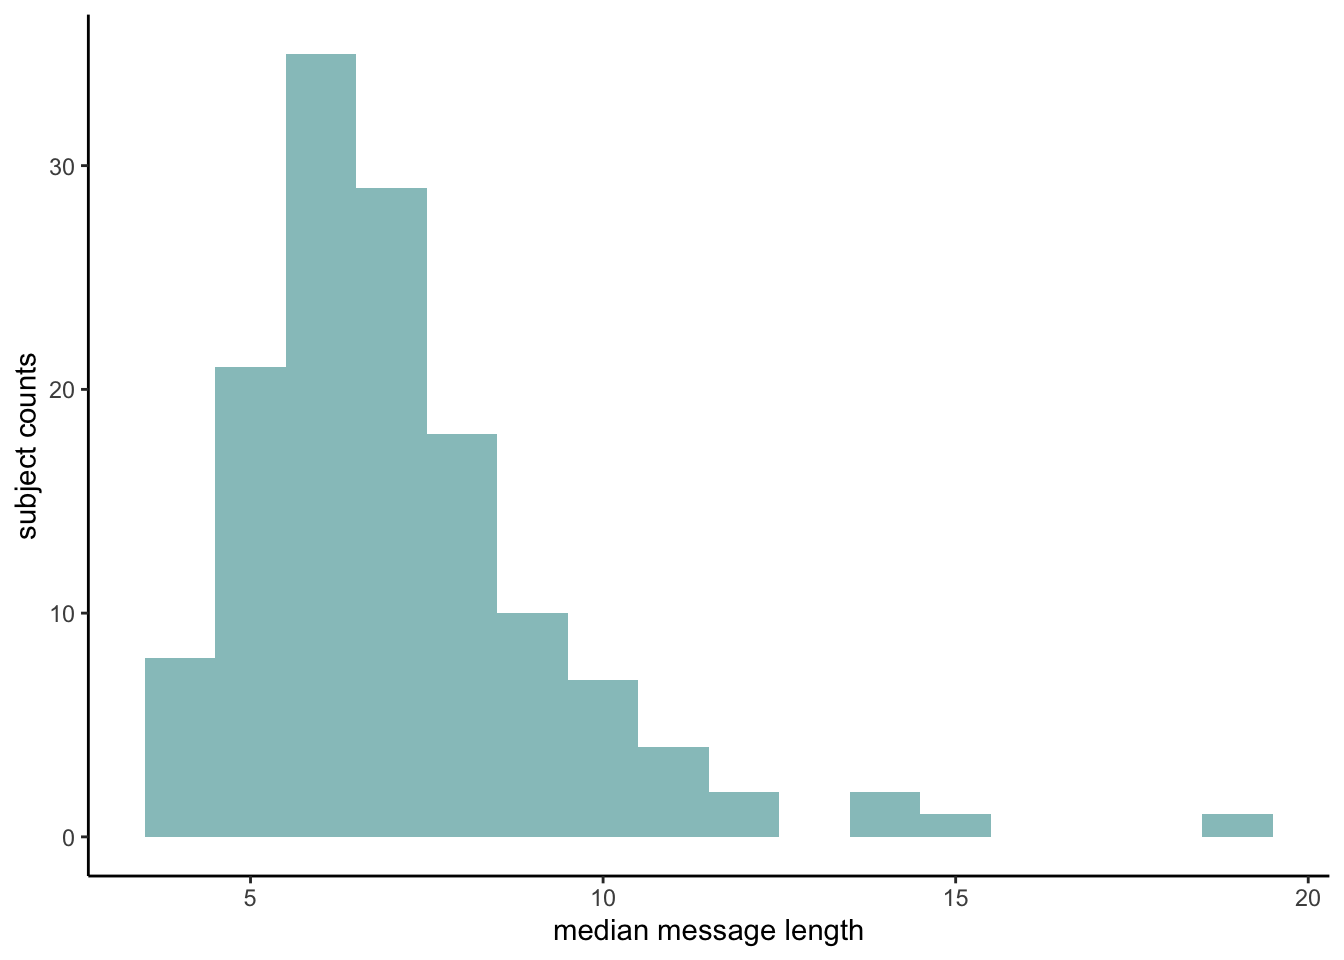

In [ ]:
raw_data |> 
  group_by(subid) |> 
  summarize(median_length = median(text_length)) |> 
  ggplot(aes(x = median_length)) + 
  geom_histogram(binwidth = 1, fill = "#97C4C5") +
  labs(x = "median message length", y = "subject counts")


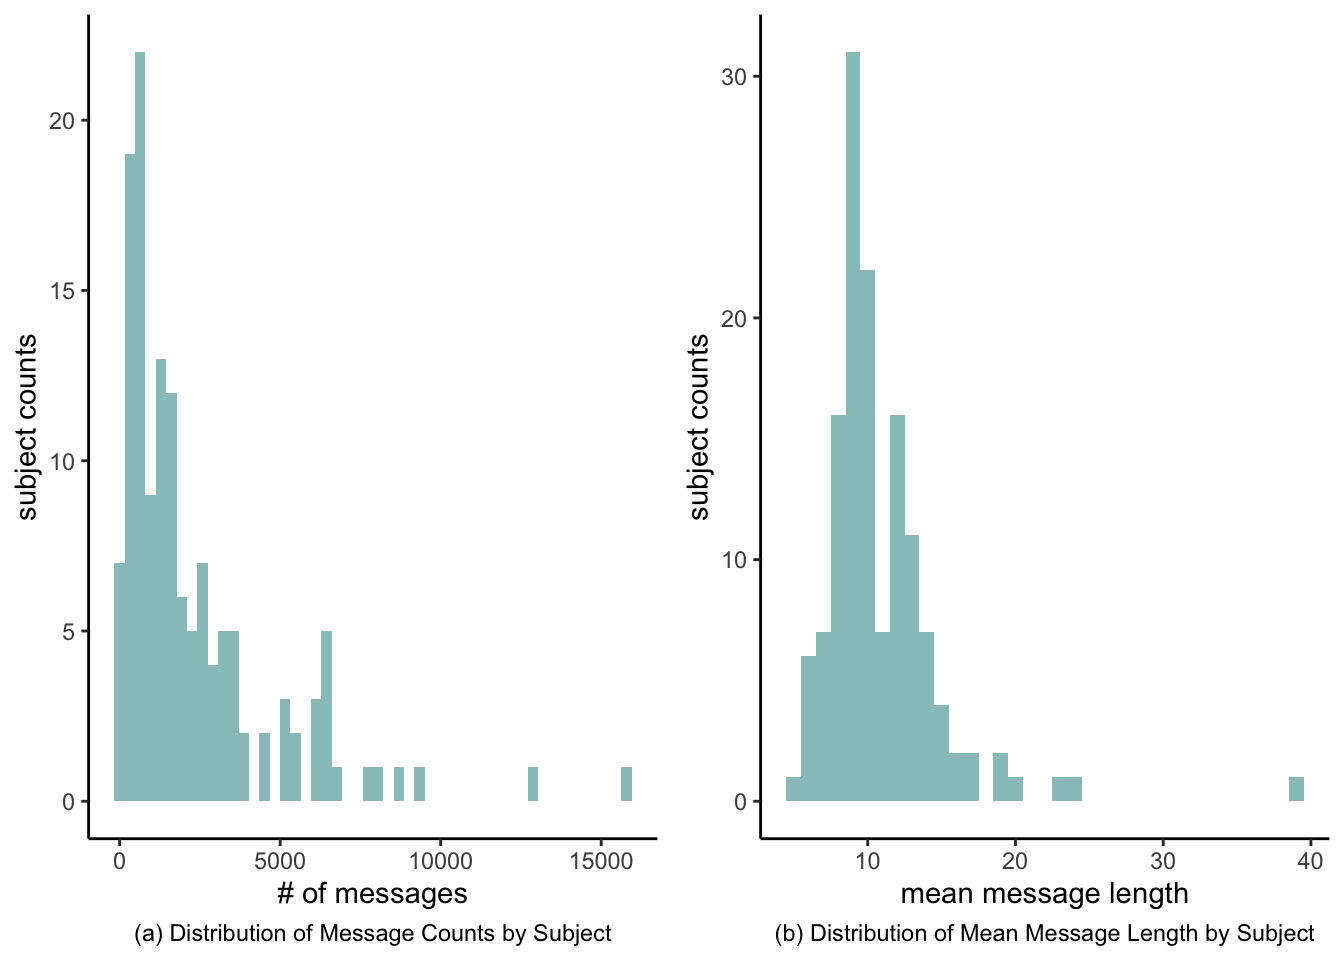

In [ ]:

ggpubr::ggarrange(plt1_raw, plt2_raw)


## EDA on prediction windows

### prediction window: 3-day

**Distribution by label**

In [ ]:
plt1_3day <- pred_3day |> 
  group_by(subid, day_start) |> 
  summarize(n = n()) |> 
  ggplot(aes(x = n)) + 
  geom_histogram(fill = "#97C4C5") +
  labs(x = "# of messages", y = "lapse counts", 
       caption = str_wrap("(a) Distribution of Message Counts"), width = 70) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

**Distribution by participant**

In [ ]:
plt2_3day <- pred_3day |> 
  group_by(subid, day_start) |> 
  summarize(
    n_messages = sum(!na)
  ) |> 
  group_by(subid) |> 
  summarize(
    mean_messages = mean(n_messages)
  ) |>
  ggplot(aes(x = mean_messages)) +
  geom_histogram(fill = "#97C4C5") +
  labs(x = "average # of messages per label", y = "subject counts",
       caption = str_wrap("(b) Distribution of Message Counts by Subject",
                          width = 70)) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

In [ ]:
plt3_3day <- pred_3day |> 
  group_by(subid, day_start) |> 
  summarize(
    missingness = sum(na) / n()
  ) |> 
  group_by(subid) |> 
  summarize(
    mean_missing = mean(missingness)
  ) |> 
  ggplot(aes(x = mean_missing)) +
  geom_histogram(fill = "#97C4C5") +
  labs(x = "percentage of missingness", y = "subject counts",
       caption = str_wrap("(c) Distribution of Missingness by Subject", 
                          width = 70)) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

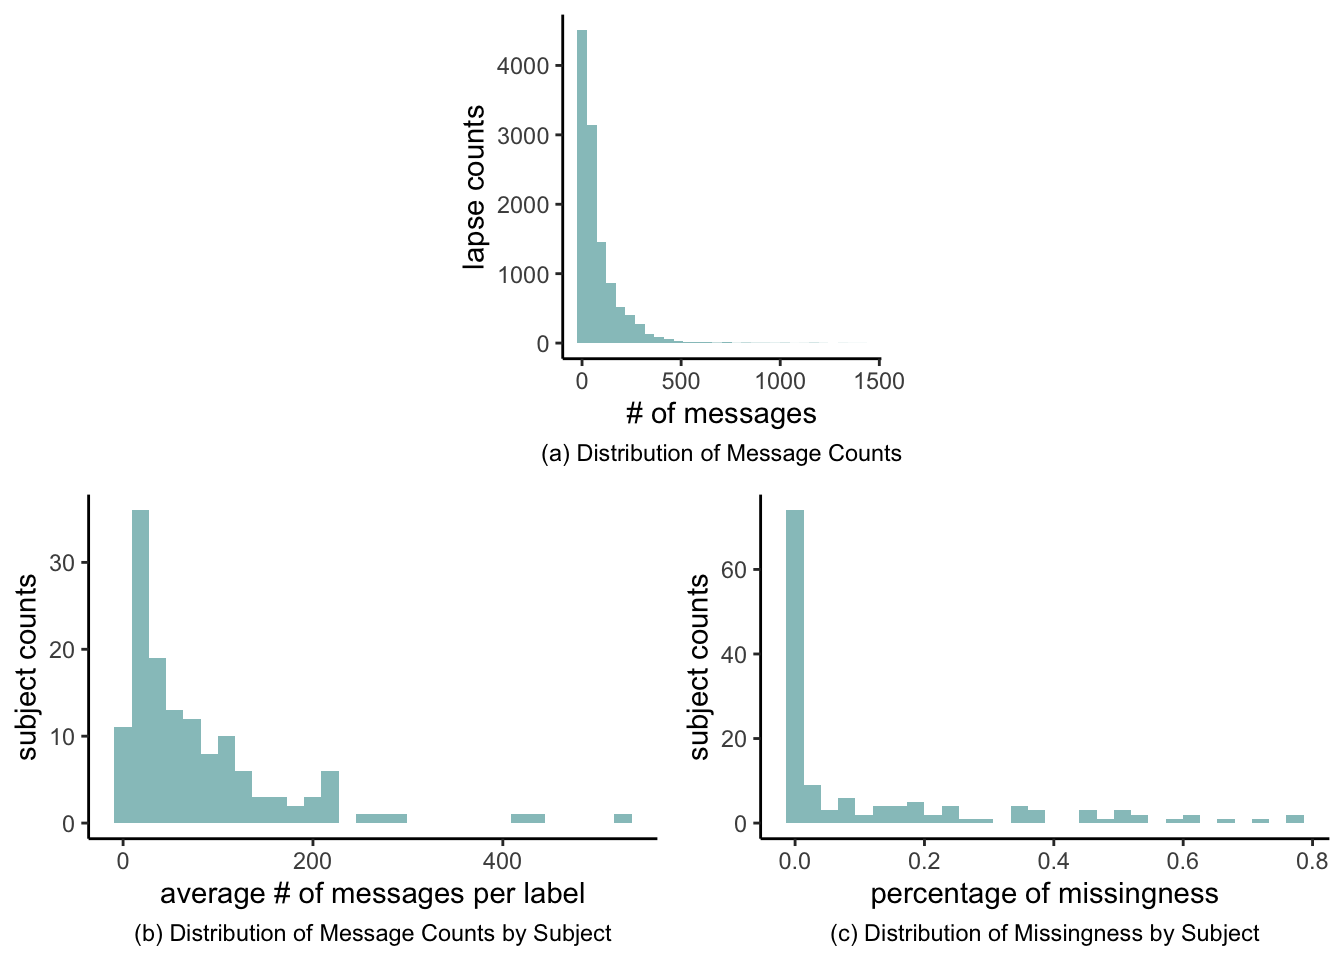

In [ ]:
ggpubr::ggarrange(
  ggpubr::ggarrange(NULL, plt1_3day, NULL, ncol = 3, widths = c(1, 1, 1)), 
  ggpubr::ggarrange(plt2_3day, plt3_3day, ncol = 2, nrow = 1),  
  nrow = 2, ncol = 1, heights = c(1, 1) 
)


### prediction window: 1 week

**Distribution by label**

In [ ]:
plt1_1week <- pred_1week |> 
  group_by(subid, day_start) |> 
  summarize(n = n()) |> 
  ggplot(aes(x = n)) + 
  geom_histogram(fill = "#97C4C5") +
  labs(x = "# of messages", y = "lapse counts", 
       caption = str_wrap("(a) Distribution of Message Counts"), width = 70) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

In [ ]:
plt2_1week <- pred_1week |> 
  group_by(subid, day_start) |> 
  summarize(
    n_messages = sum(!na)
  ) |> 
  group_by(subid) |> 
  summarize(
    mean_messages = mean(n_messages)
  ) |>
  ggplot(aes(x = mean_messages)) +
  geom_histogram(fill = "#97C4C5") +
  labs(x = "average # of messages per label", y = "subject counts",
       caption = str_wrap("(b) Distribution of Message Counts by Subject",
                          width = 70)) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

In [ ]:
plt3_1week <- pred_1week |> 
  group_by(subid, day_start) |> 
  summarize(
    missingness = sum(na) / n()
  ) |> 
  group_by(subid) |> 
  summarize(
    mean_missing = mean(missingness)
  ) |> 
  ggplot(aes(x = mean_missing)) +
  geom_histogram(fill = "#97C4C5") +
  labs(x = "percentage of missingness", y = "subject counts",
       caption = str_wrap("(c) Distribution of Missingness by Subject", 
                          width = 70)) +
  theme(plot.caption = element_text(hjust = 0.5)) 


`summarise()` has grouped output by 'subid'. You can override using the
`.groups` argument.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

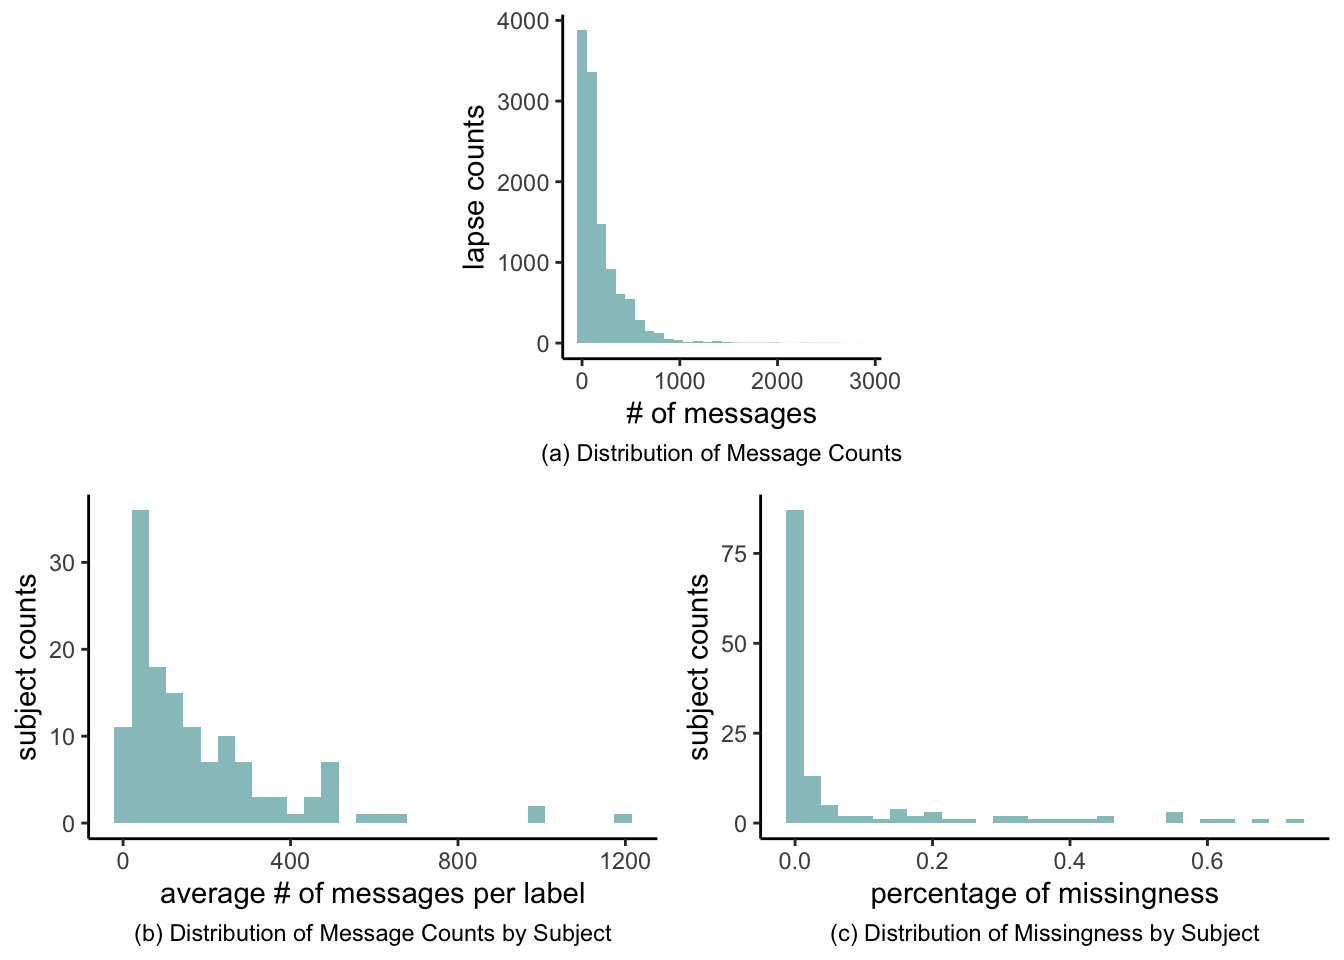

In [ ]:
ggpubr::ggarrange(
  ggpubr::ggarrange(NULL, plt1_1week, NULL, ncol = 3, widths = c(1, 1, 1)), 
  ggpubr::ggarrange(plt2_1week, plt3_1week, ncol = 2, nrow = 1),  
  nrow = 2, ncol = 1, heights = c(1, 1) 
)
